<a href="https://colab.research.google.com/github/android-kunjapppan/Fast-AI/blob/master/Fast_ai_lec1_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import warnings
warnings.filterwarnings('ignore')

* To Ensure that any edits to libraries you make are reloaded here automatically, and also that any charts and images displayed are shown in this notebook

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

* The fastai library provides many useful functional that enables us to quickly and easily build neural networks and train our models

In [2]:
from fastai import *
from fastai.vision import *

# Fastai supports:

1. Computer Vision
2. Natural Language Processing
3. Tabular data
4. Collaborative filtering


* In this notebook, we'll deal with Computer Vision

# Looking at the data

we're going to use the 'Oxford-IIIT Pet Dataset'. which features 12 cat breeds and 25 dogs breeds. with total of 37 Categories.


* We're going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data. 

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



* Dowloading the Oxfoard-IIIT Pet dataset

In [4]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
# To check what's there inside the Path Object
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
# Creatin SubPaths for images and annotations
path_anno = path/'annotations'
path_img = path/'images'

# Taking a look at the data

In [7]:
fnames = get_image_files(path_img)
# prints the first five images in the path_img 
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_194.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_36.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_139.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_136.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_103.jpg')]

* Here you can see that labels are part of the filenames/labelnames.

* We should extract class names from the file names

* we'll do this using Regular Expression

In [11]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

* Now, we'll use `from_name_re` function from the class `ImageDataBunch` class to extract class names using a regular expression

In [12]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms = get_transforms(),size = 224)
# This returns a DataBunch Object


# making all our data about the same size 
data.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_cocker_spaniel,saint_bernard,Persian,pug,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
wheaten_terrier,Maine_Coon,keeshond,beagle,boxer
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

* A DataBunch contains two or three datasets. It contains training data, validation data and test data.

* A DataBunch automatically creates a validation set


* Normalizing the image, pixel values have different set of values. it normalizes those pixel values. 

* If your data is not Normalizes, it is much difficult to train your model

# Let's take a look at the images

* we'll do this using `show_batch` function

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

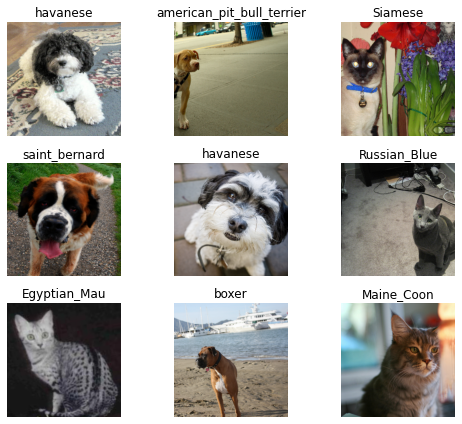

In [14]:
data.show_batch(rows=3,figsize =(7,6))

# Now looking at the labels:

* using `classes` for labels  and `c` for number of labels

In [16]:
 print(data.classes)
 print('No.of classes:',data.c) # we can use len(data.classes) too

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
No.of classes: 37


# Training: resnet34

* In fastai, a model is trained using `cnn_learner` to create CNN.

In [21]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data:fastai.basic_data.DataBunch, base_arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, bn_final:bool=False, init=<function kaiming_normal_ at 0x7fdf90218f28>, concat_pool:bool=True, **kwargs:Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [27]:
learn = cnn_learner(data,models.resnet34,metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


# fit_one_cycle:

* faster than fit method.

In [26]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.420534,0.309556,0.089986,01:29
1,0.398031,0.268897,0.078484,01:29
2,0.282234,0.227914,0.065629,01:30
3,0.179706,0.208418,0.060893,01:29


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fdf27702358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fdf27702358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    sel

* Validation set is a set images that your model does not look at

# Saving the model weights

In [28]:
learn.save('stage-1')

# Results

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

# PLotting top losses where the model didnt predict well 


In [32]:
doc(interp.plot_top_losses) # same as help function. but gives brief info

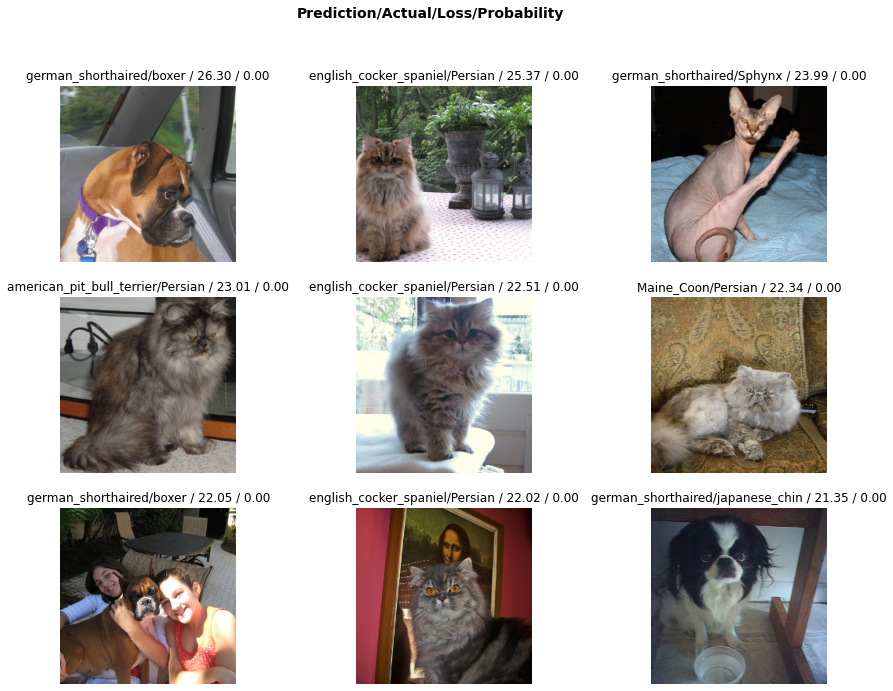

In [31]:
interp.plot_top_losses(9,figsize=(15,11))

# Plotting Confusion Matrix

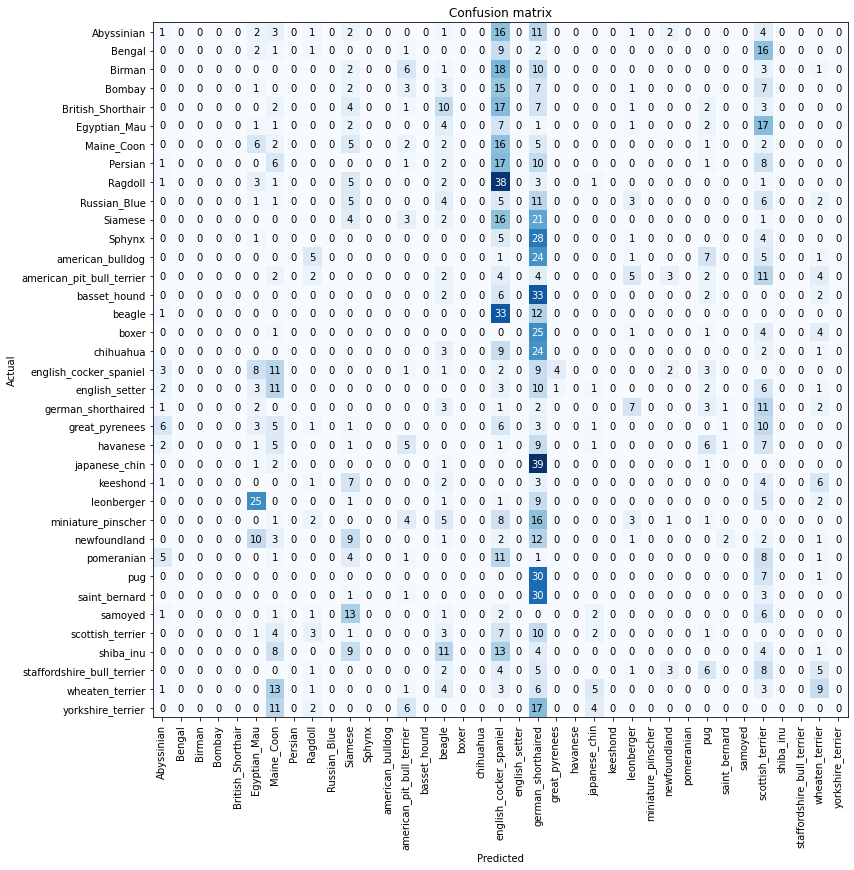

In [35]:
interp.plot_confusion_matrix(figsize=(12,12))

* using `most_confused`, grabs values from the confusion matrix and tells a paricular combination of predicted and actual that got wrong most often

In [36]:
interp.most_confused(min_val=2)

[('japanese_chin', 'german_shorthaired', 39),
 ('Ragdoll', 'english_cocker_spaniel', 38),
 ('basset_hound', 'german_shorthaired', 33),
 ('beagle', 'english_cocker_spaniel', 33),
 ('pug', 'german_shorthaired', 30),
 ('saint_bernard', 'german_shorthaired', 30),
 ('Sphynx', 'german_shorthaired', 28),
 ('boxer', 'german_shorthaired', 25),
 ('leonberger', 'Egyptian_Mau', 25),
 ('american_bulldog', 'german_shorthaired', 24),
 ('chihuahua', 'german_shorthaired', 24),
 ('Siamese', 'german_shorthaired', 21),
 ('Birman', 'english_cocker_spaniel', 18),
 ('British_Shorthair', 'english_cocker_spaniel', 17),
 ('Egyptian_Mau', 'scottish_terrier', 17),
 ('Persian', 'english_cocker_spaniel', 17),
 ('yorkshire_terrier', 'german_shorthaired', 17),
 ('Abyssinian', 'english_cocker_spaniel', 16),
 ('Bengal', 'scottish_terrier', 16),
 ('Maine_Coon', 'english_cocker_spaniel', 16),
 ('Siamese', 'english_cocker_spaniel', 16),
 ('miniature_pinscher', 'german_shorthaired', 16),
 ('Bombay', 'english_cocker_spaniel

# UnFreezing, Fine-Tuning and Learning rates

* Since our model is working as we expect it to, we will **unfreeze** our model and train some more

In [37]:
learn.unfreeze()
# It tells to train the whole model

In [38]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.909453,0.330744,0.109608,01:24


* The error_rate got much worse.


# loading the saved weights

In [39]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_cocker_spaniel,saint_bernard,Persian,pug,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
wheaten_terrier,Maine_Coon,keeshond,beagle,boxer
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), str

# Learning Rate Finder:
* what is the fastest lr to train the NN faster

In [40]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


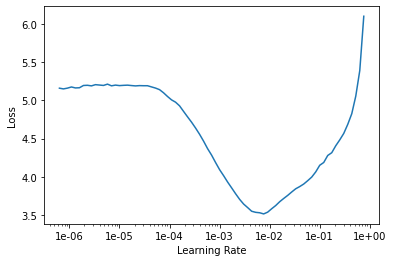

In [41]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6,1e-4))

That's a pretty accurate model!!

# Training : ResNet50

# Other data Formats

In [61]:
# MNIST
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [62]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

In [64]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/7'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3')]

applying transforms

In [66]:
tfms = get_transforms(do_flip = False)
data = ImageDataBunch.from_folder(path,ds_tfms =  tfms , size =28)

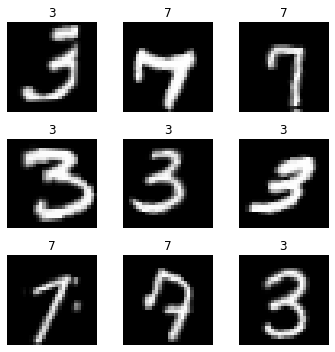

In [68]:
data.show_batch(rows = 3, figsize=(5,5))

# with csv file

In [69]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [70]:
data = ImageDataBunch.from_csv(path,ds_tfms = tfms , size =28)

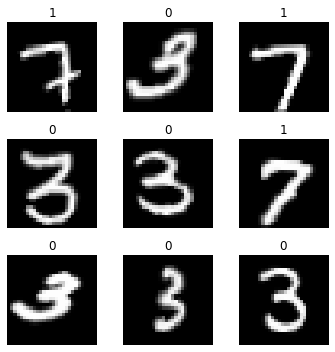

In [71]:
data.show_batch(rows = 3, figsize=(5,5))

# From DataFrame

In [72]:
data = ImageDataBunch.from_df(path,df,ds_tfms = tfms, size =29)
data.classes

[0, 1]

# from paths

In [73]:
fn_paths = [path/name for name in df['name']]
fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

# Creating a function to extract a label

In [74]:
data = ImageDataBunch.from_name_func(path,fn_paths,ds_tfms = tfms,size = 28,
                                     label_func=lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

# From Lists

In [75]:
# Create a array of labels
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [76]:
data = ImageDataBunch.from_lists(path,fn_paths,labels = labels,ds_tfms = tfms , size = 28)
data.classes

['3', '7']